# Churn Modelling Prediction

Project to develop a model to predict churn.

Database source: [Kagle](https://www.kaggle.com/datasets/shubh0799/churn-modelling/data)

Data descripition:

* **RowNumber**: corresponds to the record (row) number.
* **CustomerId**: contains random values.
* **Surname**: the surname of a customer.
* **CreditScore**: 
* **Geography**: a customer’s location.
* **Gender**: 
* **Age**: 
* **Tenure**: refers to the number of years that the customer has been a client of the bank.
* **Balance**: The amount left with them
* **NumOfProducts**: refers to the number of products that a customer has purchased through the bank.
* **HasCrCard**: denotes whether or not a customer has a credit card.
* **IsActiveMember**: active customers are less likely to leave the bank.
* **EstimatedSalary**: 
* **Exited**: whether or not the customer left the bank. (0=No,1=Yes)

# Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.shape

(10000, 14)

In [5]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Data cleaning

In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
data.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [15]:
print(np.unique(data['Geography'], return_counts=True))
print(np.unique(data['Geography'], return_counts=True)[1]/10000)

(array(['France', 'Germany', 'Spain'], dtype=object), array([5014, 2509, 2477], dtype=int64))
[0.5014 0.2509 0.2477]


In [16]:
print(np.unique(data['Gender'], return_counts=True))
print(np.unique(data['Gender'], return_counts=True)[1]/10000)

(array(['Female', 'Male'], dtype=object), array([4543, 5457], dtype=int64))
[0.4543 0.5457]


Data doesn't need cleaning.

# Data exploration

## Credit Score

In [29]:
data['CreditScore'].describe().round(2)

count    10000.00
mean       650.53
std         96.65
min        350.00
25%        584.00
50%        652.00
75%        718.00
max        850.00
Name: CreditScore, dtype: float64

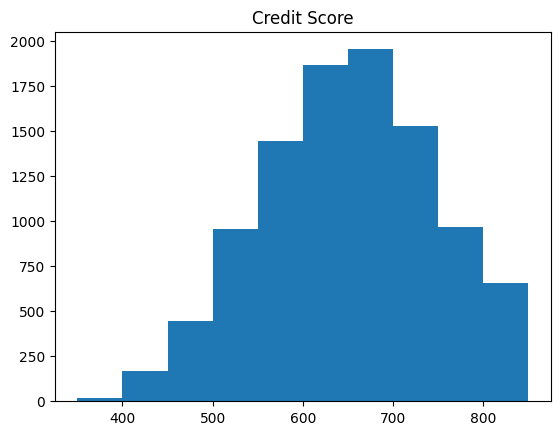

In [21]:
plt.hist(data['CreditScore'])
plt.title("Credit Score")
plt.show()

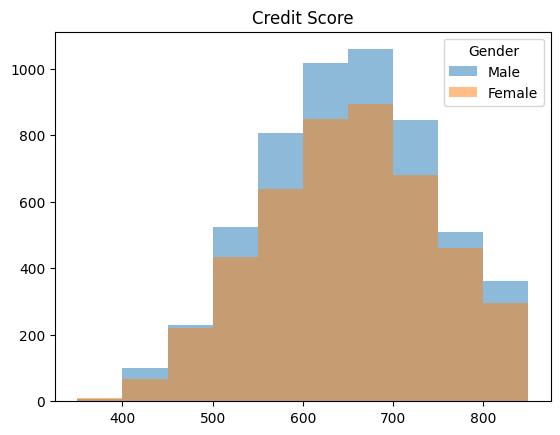

In [26]:
plt.hist(data.loc[data['Gender'] == "Male",'CreditScore'], alpha=0.5, label = "Male")
plt.hist(data.loc[data['Gender'] == "Female",'CreditScore'], alpha=0.5, label = "Female")
plt.title("Credit Score")
plt.legend(title='Gender')
plt.show()
# remember the distribution: female is 0.4543 and male is 0.5457

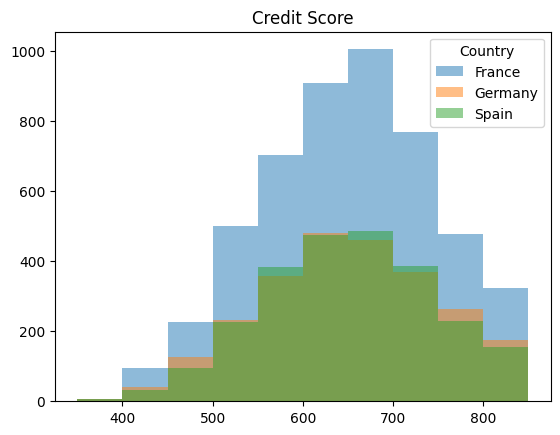

In [27]:
plt.hist(data.loc[data['Geography'] == "France",'CreditScore'], alpha=0.5, label = "France")
plt.hist(data.loc[data['Geography'] == "Germany",'CreditScore'], alpha=0.5, label = "Germany")
plt.hist(data.loc[data['Geography'] == "Spain",'CreditScore'], alpha=0.5, label = "Spain")
plt.title("Credit Score")
plt.legend(title='Country')
plt.show()
# remember the distribution: france is 0.5014, germany is 0.2509 and spain is 0.2477

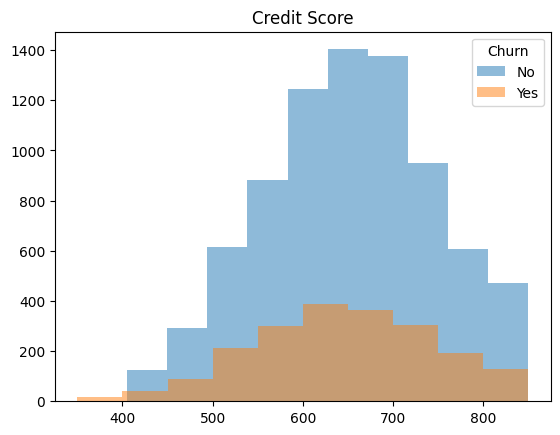

In [33]:
plt.hist(data.loc[data['Exited'] == 0,'CreditScore'], alpha=0.5, label = "No")
plt.hist(data.loc[data['Exited'] == 1,'CreditScore'], alpha=0.5, label = "Yes")
plt.title("Credit Score")
plt.legend(title='Churn')
plt.show()
# remember the distribution: no churn is 0.8 and churn is 0.2

## Age

In [30]:
data['Age'].describe().round(2)

count    10000.00
mean        38.92
std         10.49
min         18.00
25%         32.00
50%         37.00
75%         44.00
max         92.00
Name: Age, dtype: float64

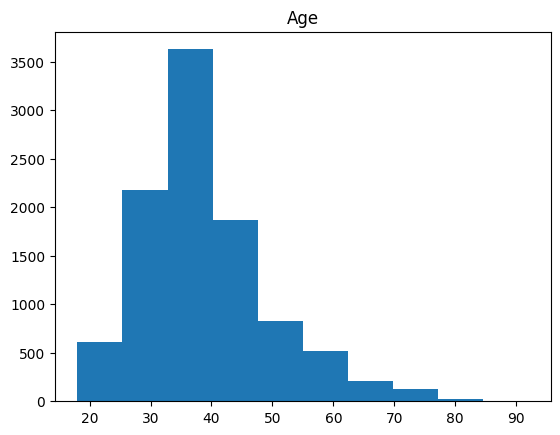

In [31]:
plt.hist(data['Age'])
plt.title("Age")
plt.show()

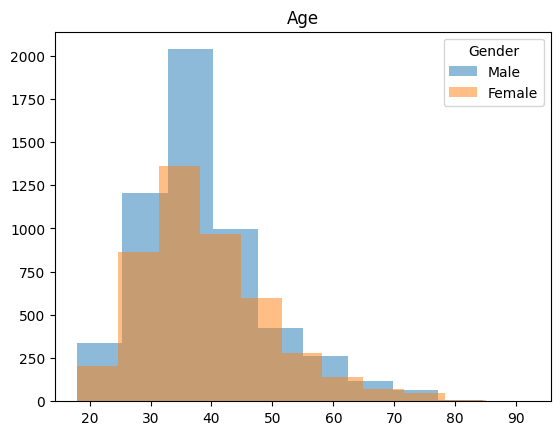

In [34]:
plt.hist(data.loc[data['Gender'] == "Male",'Age'], alpha=0.5, label = "Male")
plt.hist(data.loc[data['Gender'] == "Female",'Age'], alpha=0.5, label = "Female")
plt.title("Age")
plt.legend(title='Gender')
plt.show()
# remember the distribution: female is 0.4543 and male is 0.5457

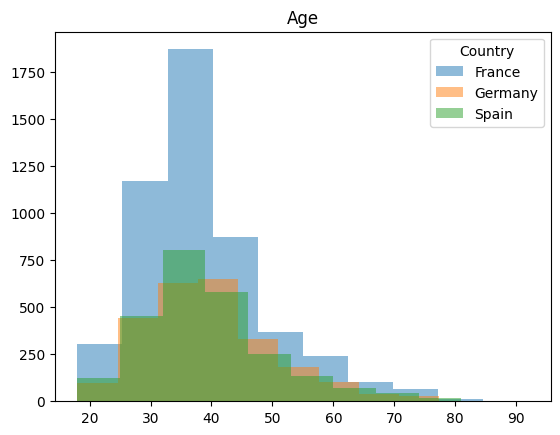

In [35]:
plt.hist(data.loc[data['Geography'] == "France",'Age'], alpha=0.5, label = "France")
plt.hist(data.loc[data['Geography'] == "Germany",'Age'], alpha=0.5, label = "Germany")
plt.hist(data.loc[data['Geography'] == "Spain",'Age'], alpha=0.5, label = "Spain")
plt.title("Age")
plt.legend(title='Country')
plt.show()
# remember the distribution: france is 0.5014, germany is 0.2509 and spain is 0.2477

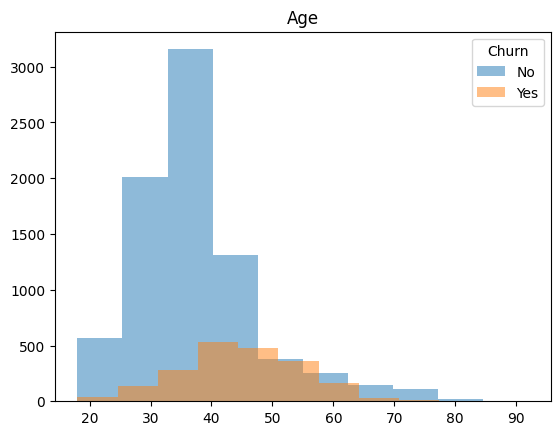

In [36]:
plt.hist(data.loc[data['Exited'] == 0,'Age'], alpha=0.5, label = "No")
plt.hist(data.loc[data['Exited'] == 1,'Age'], alpha=0.5, label = "Yes")
plt.title("Age")
plt.legend(title='Churn')
plt.show()
# remember the distribution: no churn is 0.8 and churn is 0.2

## Salary

In [37]:
data['EstimatedSalary'].describe().round(2)

count     10000.00
mean     100090.24
std       57510.49
min          11.58
25%       51002.11
50%      100193.92
75%      149388.25
max      199992.48
Name: EstimatedSalary, dtype: float64

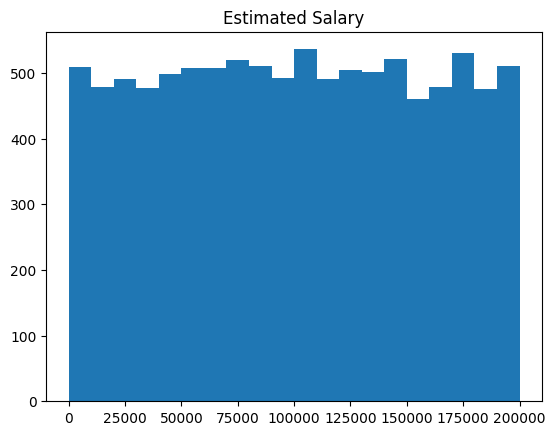

In [41]:
plt.hist(data['EstimatedSalary'], bins=20)
plt.title("Estimated Salary")
plt.show()

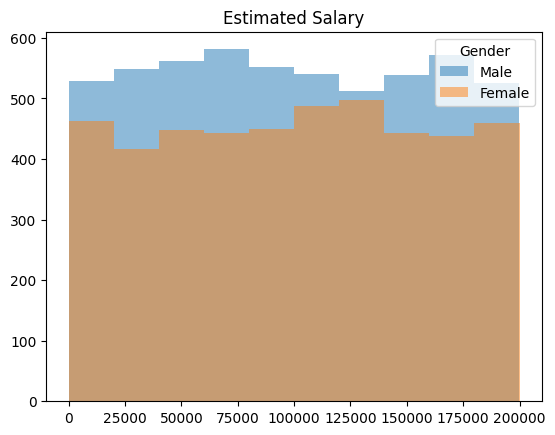

In [47]:
plt.hist(data.loc[data['Gender'] == "Male",  'EstimatedSalary'], alpha=0.5, label = "Male")
plt.hist(data.loc[data['Gender'] == "Female",'EstimatedSalary'], alpha=0.5, label = "Female")
plt.title("Estimated Salary")
plt.legend(title='Gender')
plt.show()
# remember the distribution: female is 0.4543 and male is 0.5457

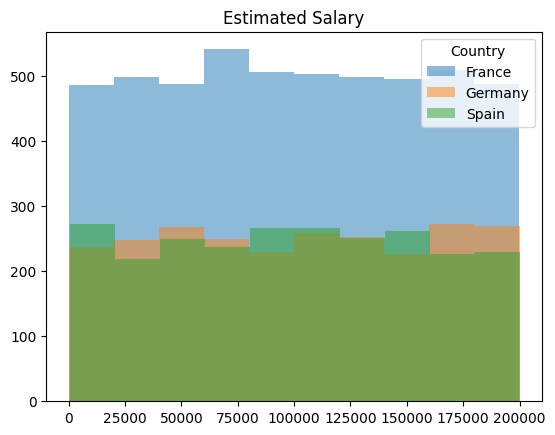

In [48]:
plt.hist(data.loc[data['Geography'] == "France", 'EstimatedSalary'], alpha=0.5, label = "France")
plt.hist(data.loc[data['Geography'] == "Germany",'EstimatedSalary'], alpha=0.5, label = "Germany")
plt.hist(data.loc[data['Geography'] == "Spain",  'EstimatedSalary'], alpha=0.5, label = "Spain")
plt.title("Estimated Salary")
plt.legend(title='Country')
plt.show()
# remember the distribution: france is 0.5014, germany is 0.2509 and spain is 0.2477

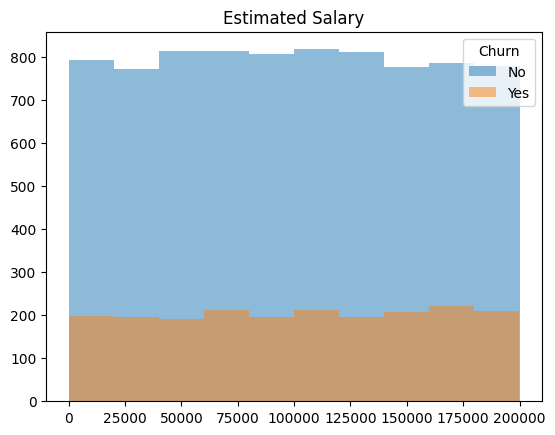

In [49]:
plt.hist(data.loc[data['Exited'] == 0,'EstimatedSalary'], alpha=0.5, label = "No")
plt.hist(data.loc[data['Exited'] == 1,'EstimatedSalary'], alpha=0.5, label = "Yes")
plt.title("Estimated Salary")
plt.legend(title='Churn')
plt.show()
# remember the distribution: no churn is 0.8 and churn is 0.2

## Balance

In [65]:
data['Balance'].describe().round(2)

count     10000.00
mean      76485.89
std       62397.41
min           0.00
25%           0.00
50%       97198.54
75%      127644.24
max      250898.09
Name: Balance, dtype: float64

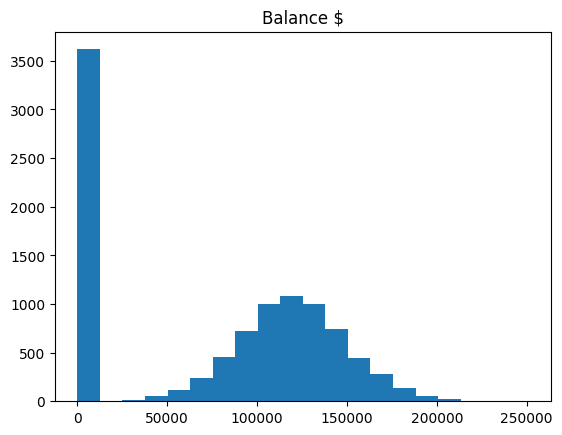

In [66]:
plt.hist(data['Balance'], bins=20)
plt.title("Balance $")
plt.show()

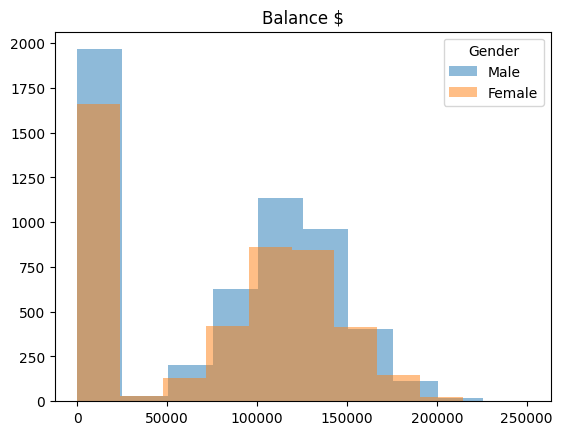

In [67]:
plt.hist(data.loc[data['Gender'] == "Male",  'Balance'], alpha=0.5, label = "Male")
plt.hist(data.loc[data['Gender'] == "Female",'Balance'], alpha=0.5, label = "Female")
plt.title("Balance $")
plt.legend(title='Gender')
plt.show()
# remember the distribution: female is 0.4543 and male is 0.5457

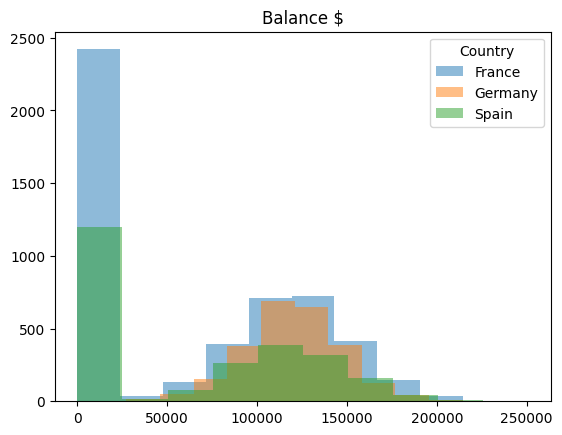

In [68]:
plt.hist(data.loc[data['Geography'] == "France", 'Balance'], alpha=0.5, label = "France")
plt.hist(data.loc[data['Geography'] == "Germany",'Balance'], alpha=0.5, label = "Germany")
plt.hist(data.loc[data['Geography'] == "Spain",  'Balance'], alpha=0.5, label = "Spain")
plt.title("Balance $")
plt.legend(title='Country')
plt.show()
# remember the distribution: france is 0.5014, germany is 0.2509 and spain is 0.2477

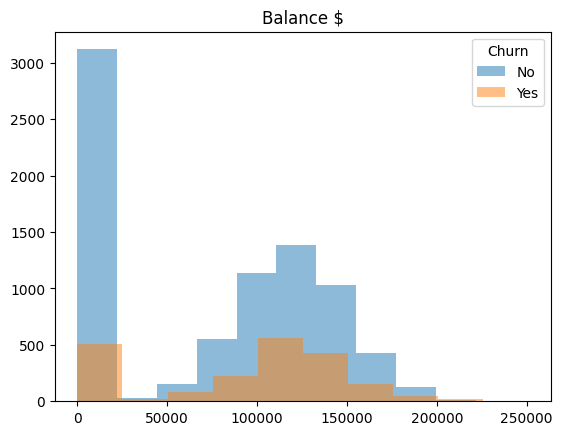

In [69]:
plt.hist(data.loc[data['Exited'] == 0,'Balance'], alpha=0.5, label = "No")
plt.hist(data.loc[data['Exited'] == 1,'Balance'], alpha=0.5, label = "Yes")
plt.title("Balance $")
plt.legend(title='Churn')
plt.show()
# remember the distribution: no churn is 0.8 and churn is 0.2

## Tenure

In [71]:
data['Tenure'].describe().round(2)

count    10000.00
mean         5.01
std          2.89
min          0.00
25%          3.00
50%          5.00
75%          7.00
max         10.00
Name: Tenure, dtype: float64

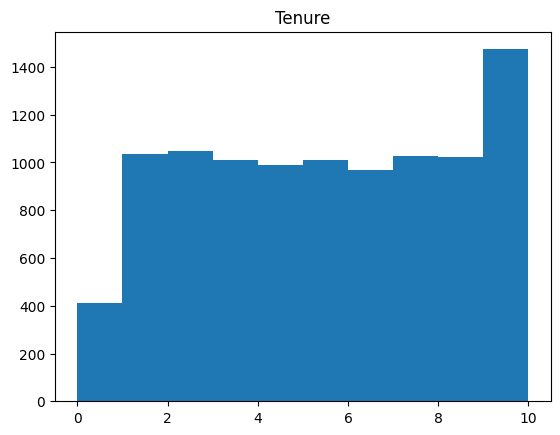

In [73]:
plt.hist(data['Tenure'], bins=10)
plt.title("Tenure")
plt.show()

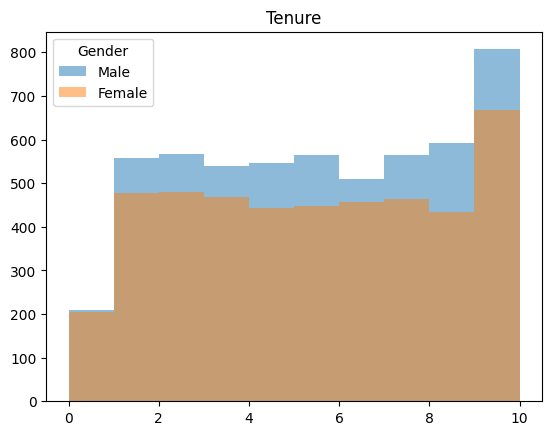

In [74]:
plt.hist(data.loc[data['Gender'] == "Male",  'Tenure'], alpha=0.5, label = "Male")
plt.hist(data.loc[data['Gender'] == "Female",'Tenure'], alpha=0.5, label = "Female")
plt.title("Tenure")
plt.legend(title='Gender')
plt.show()
# remember the distribution: female is 0.4543 and male is 0.5457

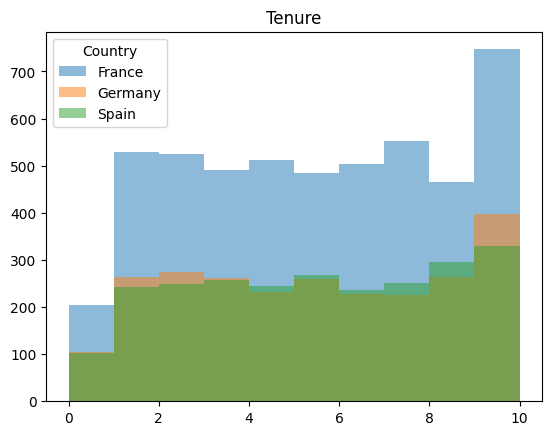

In [75]:
plt.hist(data.loc[data['Geography'] == "France", 'Tenure'], alpha=0.5, label = "France")
plt.hist(data.loc[data['Geography'] == "Germany",'Tenure'], alpha=0.5, label = "Germany")
plt.hist(data.loc[data['Geography'] == "Spain",  'Tenure'], alpha=0.5, label = "Spain")
plt.title("Tenure")
plt.legend(title='Country')
plt.show()
# remember the distribution: france is 0.5014, germany is 0.2509 and spain is 0.2477

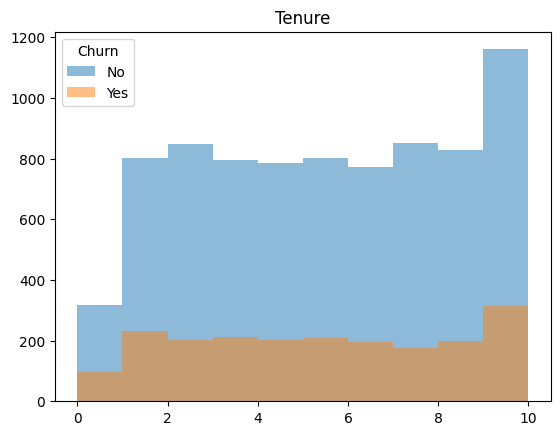

In [76]:
plt.hist(data.loc[data['Exited'] == 0,'Tenure'], alpha=0.5, label = "No")
plt.hist(data.loc[data['Exited'] == 1,'Tenure'], alpha=0.5, label = "Yes")
plt.title("Tenure")
plt.legend(title='Churn')
plt.show()
# remember the distribution: no churn is 0.8 and churn is 0.2

## Correlation

In [63]:
data[['CreditScore', 'Age', 'Tenure', 'Balance', 
      'NumOfProducts', 'HasCrCard', 'IsActiveMember',
      'EstimatedSalary', 'Exited']].corr(numeric_only=True).style.background_gradient(cmap='Blues', axis=None)#.round(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


## Comments

In the histogram graphs, it's worth looking at the difference between the age distribution of those who left the bank and those who didn't. The main concentration of people among those who left is between 40 and 55 years old. The main concentration of people among those who left is between 40 and 55 years old. Now, considering those who remained at the bank, they are concentrated between 25 and 45 years of age. We can also see such relationship between age and leave the bank expressed on their correlation.

Another stronger correlation is between your cash balance and the number of products you own. However, the result can be counter-intuitive, as the more money you have left over, the fewer products you have.

# Checking for outliers

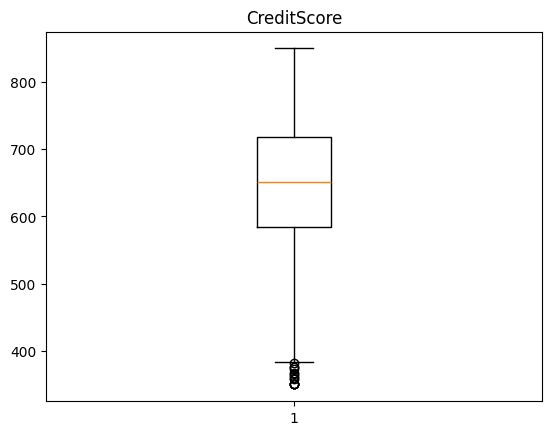

[383.0, 850.0]

In [105]:

boxplot = plt.boxplot(data['CreditScore'])
plt.title("CreditScore")
plt.show()
[item.get_ydata()[1] for item in boxplot['whiskers']] #value of lower and upper fence


In [111]:
data[data['CreditScore'] <383].shape[0] # counting outliers

15

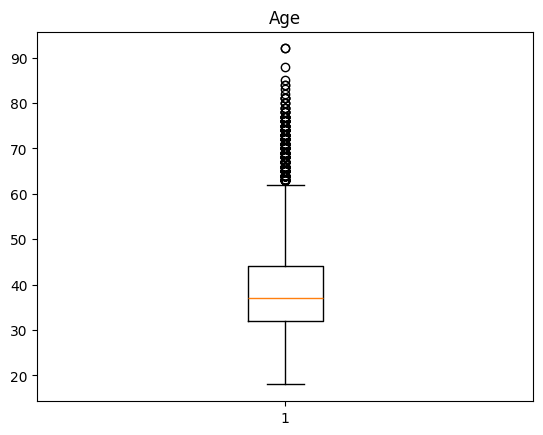

[18.0, 62.0]

In [106]:
boxplot = plt.boxplot(data['Age'])
plt.title("Age")
plt.show()
[item.get_ydata()[1] for item in boxplot['whiskers']] #value of lower and upper fence


In [112]:
data[data['Age'] >62].shape[0] # counting outliers

359

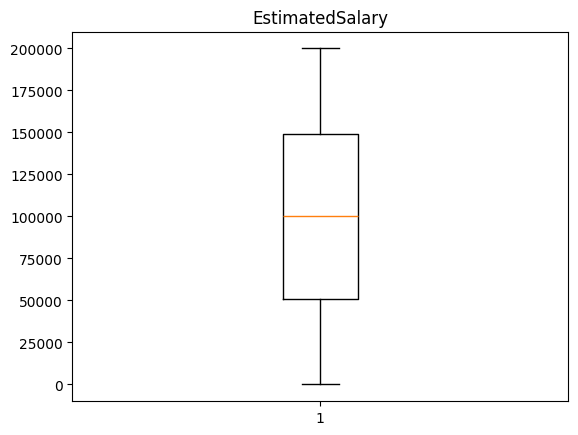

In [90]:
plt.boxplot(data['EstimatedSalary'])
plt.title("EstimatedSalary")
plt.show()

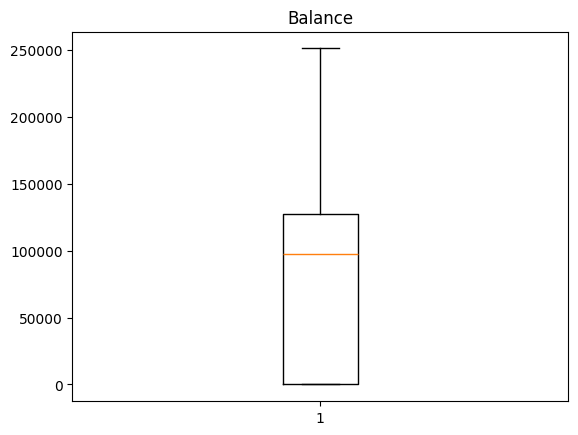

In [91]:
plt.boxplot(data['Balance'])
plt.title("Balance")
plt.show()

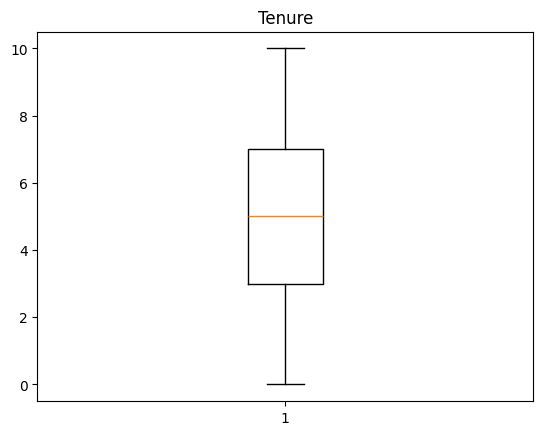

In [92]:
plt.boxplot(data['Tenure'])
plt.title("Tenure")
plt.show()

In [3]:
# total number of outliers
print(data[(data['CreditScore'] <383) | (data['Age'] >62)].shape[0])
print(data[(data['CreditScore'] <383) | (data['Age'] >62)].shape[0]/10000)

374
0.0374


Creating data without outliers

In [3]:
dataNoOut = data[(data['CreditScore'] >=383)]
dataNoOut = dataNoOut[(dataNoOut['Age'] <= 62)]
dataNoOut.shape

(9626, 14)

# Data prep for modelling

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [141]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [139]:
x = dataNoOut.iloc[:,3:13].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [140]:
x[0]

array([619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [141]:
y = dataNoOut.iloc[:,13].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [58]:
# not considering "HasCrCard", "EstimatedSalary" and "Tenure" based com correlation (excluding the lowest module correlation with output)
x2 = dataNoOut.iloc[:,[3,4,5,6,8,9,11]].values
x2

array([[619, 'France', 'Female', ..., 0.0, 1, 1],
       [608, 'Spain', 'Female', ..., 83807.86, 1, 1],
       [502, 'France', 'Female', ..., 159660.8, 3, 0],
       ...,
       [709, 'France', 'Female', ..., 0.0, 1, 1],
       [772, 'Germany', 'Male', ..., 75075.31, 2, 0],
       [792, 'France', 'Female', ..., 130142.79, 1, 0]], dtype=object)

In [59]:
x2[0:2]

array([[619, 'France', 'Female', 42, 0.0, 1, 1],
       [608, 'Spain', 'Female', 41, 83807.86, 1, 1]], dtype=object)

In [143]:
label_encoder_geography = LabelEncoder()
label_encoder_gender = LabelEncoder()

x[:,1] = label_encoder_geography.fit_transform(x[:,1])
x[:,2] = label_encoder_gender.fit_transform(x[:,2])

In [60]:
x2[:,1] = label_encoder_geography.fit_transform(x2[:,1])
x2[:,2] = label_encoder_gender.fit_transform(x2[:,2])

In [9]:
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [61]:
x2

array([[619, 0, 0, ..., 0.0, 1, 1],
       [608, 2, 0, ..., 83807.86, 1, 1],
       [502, 0, 0, ..., 159660.8, 3, 0],
       ...,
       [709, 0, 0, ..., 0.0, 1, 1],
       [772, 1, 1, ..., 75075.31, 2, 0],
       [792, 0, 0, ..., 130142.79, 1, 0]], dtype=object)

In [ ]:
onehot_encoder = ColumnTransformer(transformers = [("OneHote", OneHotEncoder(),[1])], 
                                                           remainder = 'passthrough')

In [144]:
x_teste = onehot_encoder.fit_transform(x)#.toarray()

In [149]:
x_teste[0:3]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57]],
      dtype=object)

In [146]:
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_testeover, y_testeover = smote.fit_resample(x_teste,y)

In [147]:
df = pd.DataFrame(x_testeover)

In [148]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
5,0.0,0.0,1.0,645.0,1.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71
6,1.0,0.0,0.0,822.0,1.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80
7,1.0,0.0,0.0,501.0,1.0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50
8,1.0,0.0,0.0,684.0,1.0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73
9,1.0,0.0,0.0,528.0,1.0,31.0,6.0,102016.72,2.0,0.0,0.0,80181.12


In [156]:
df[5]

0        42.000000
1        41.000000
2        42.000000
3        39.000000
4        43.000000
           ...    
15349    44.962979
15350    35.251646
15351    39.254433
15352    48.239015
15353    56.337071
Name: 5, Length: 15354, dtype: float64

In [155]:
np.unique(df[5])#.round(0)

array([18.        , 19.        , 19.24637953, ..., 61.87230972,
       61.96778377, 62.        ])

## Imbalanced data: Oversampling - Smote

In [10]:
np.unique(dataNoOut['Exited'], return_counts=True)[1]/9626

array([0.79752753, 0.20247247])

In [11]:
np.unique(data['Exited'], return_counts=True)[1]/10000

array([0.7963, 0.2037])

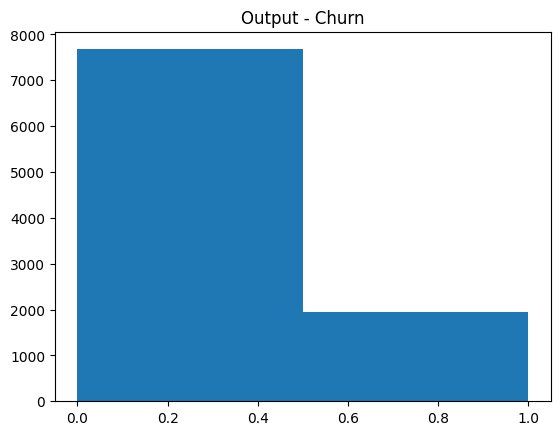

In [142]:
plt.hist(dataNoOut['Exited'], bins=2)
plt.title("Output - Churn")
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE


In [110]:
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_over, y_over = smote.fit_resample(x,y)

In [14]:
x.shape, y.shape

((9626, 10), (9626,))

In [111]:
x_over.shape, y_over.shape

((15354, 10), (15354,))

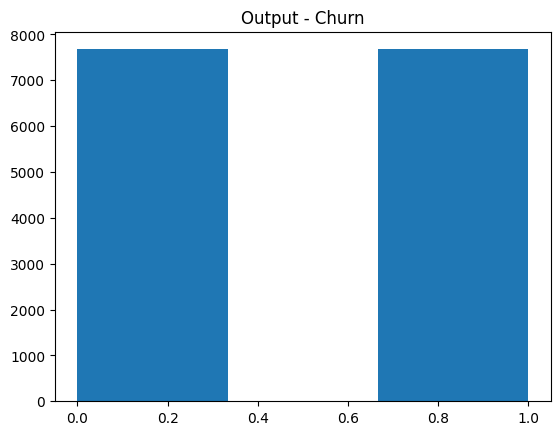

In [14]:
plt.hist(y_over, bins=3)
plt.title("Output - Churn")
plt.show()

In [62]:
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_over2, y_over2 = smote.fit_resample(x2,y)
x_over2.shape, y_over2.shape

((15354, 7), (15354,))

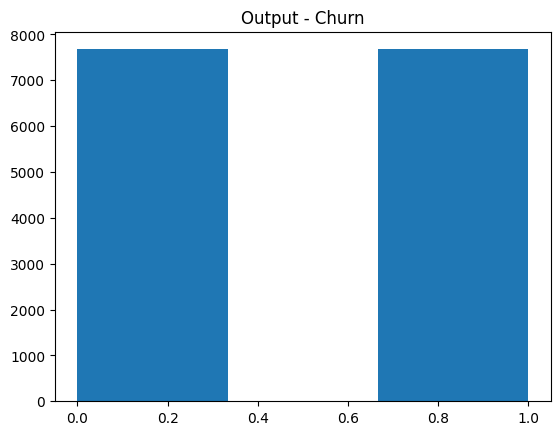

In [63]:
plt.hist(y_over, bins=3)
plt.title("Output - Churn")
plt.show()

## Train and test data

In [15]:
x_over_training, x_over_test, y_over_training, y_over_test = train_test_split(x_over,y_over,
                                                                              test_size = 0.15,
                                                                              random_state = 0)

In [16]:
x_over_training.shape, x_over_test.shape, y_over_training.shape, y_over_test.shape

((13050, 10), (2304, 10), (13050,), (2304,))

In [64]:
x_over_training2, x_over_test2, y_over_training2, y_over_test2 = train_test_split(x_over2,y_over2,
                                                                              test_size = 0.15,
                                                                              random_state = 0)
x_over_training2.shape, x_over_test2.shape, y_over_training2.shape, y_over_test2.shape

((13050, 7), (2304, 7), (13050,), (2304,))

## Standard data

In [17]:
scaler = StandardScaler()
x_over_training_scaled = scaler.fit_transform(x_over_training)
x_over_test_scaled = scaler.fit_transform(x_over_test)
x_over_scaled = scaler.fit_transform(x_over) # for cross validation

In [65]:
scaler = StandardScaler()
x_over_training_scaled2 = scaler.fit_transform(x_over_training2)
x_over_test_scaled2 = scaler.fit_transform(x_over_test2)
x_over_scaled2 = scaler.fit_transform(x_over2) # for cross validation

# Modelling

In [26]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score ,StratifiedKFold, cross_validate

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [261]:
parameters = {'tol': [0.0001,0.00001,0.000001],
              'C': [1.0,1.5,2.0],
              'solver' :['lbfgs','sag','saga']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state=0),param_grid = parameters, cv=10)
grid_search.fit(x_over_scaled, y_over)
print(grid_search.best_params_) , print(grid_search.best_score_)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.7242428830754614


(None, None)

In [44]:
logist = LogisticRegression(random_state=0, tol = 0.0001, C=1.0 , solver = "lbfgs") #same as default
logist.fit(x_over_training_scaled, y_over_training)

LogisticRegression(random_state=0)

In [264]:
prediction = logist.predict(x_over_test_scaled)
print(classification_report(y_over_test,prediction, digits=4))

              precision    recall  f1-score   support

           0     0.7155    0.7050    0.7102      1149
           1     0.7108    0.7212    0.7159      1155

    accuracy                         0.7131      2304
   macro avg     0.7131    0.7131    0.7131      2304
weighted avg     0.7131    0.7131    0.7131      2304



In [265]:
round(logist.score(x_over_training_scaled, y_over_training),4) #check for overfitting

0.7283

In [266]:
fpr, tpr, thresholds = roc_curve(y_over_test, prediction)
print("AUC:",auc(fpr, tpr).round(4))

AUC: 0.7131


In [267]:
## CROSS VALIDATION
scores = cross_val_score(logist, 
                         x_over_scaled, 
                         y_over, 
                         cv=10)
# Print the accuracy for each fold:
print(scores.round(4))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(4))

[0.7109 0.7227 0.6999 0.7383 0.7238 0.7472 0.727  0.7349 0.7205 0.7173]
0.7242


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [269]:
parameters = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [1,2,5],
              'min_samples_leaf' : [1,2,5]}
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0),param_grid = parameters, cv=10)
grid_search.fit(x_over_scaled, y_over)
print(grid_search.best_params_) , print(grid_search.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
0.8706080771579805


C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    vali

(None, None)

In [47]:
decTree = DecisionTreeClassifier(random_state=0, criterion= 'entropy', min_samples_leaf= 5, min_samples_split= 2, splitter= 'best') #same as default
decTree.fit(x_over_training_scaled, y_over_training)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, random_state=0)

In [48]:
prediction = decTree.predict(x_over_test_scaled)
print(classification_report(y_over_test,prediction, digits=4))

              precision    recall  f1-score   support

           0     0.8000    0.0070    0.0138      1149
           1     0.5026    0.9983    0.6686      1155

    accuracy                         0.5039      2304
   macro avg     0.6513    0.5026    0.3412      2304
weighted avg     0.6509    0.5039    0.3421      2304



In [49]:
round(decTree.score(x_over_training_scaled, y_over_training),4) #check for overfitting

0.946

It's overfitting

In [50]:
fpr, tpr, thresholds = roc_curve(y_over_test, prediction)
print("AUC:",auc(fpr, tpr).round(4))

AUC: 0.5026


Fixing overfitting:

In [91]:
# StratifiedKFold for classification problems to ensure the same class distribution in each fold
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

validation = cross_validate(decTree, 
                         x_over_scaled, 
                         y_over, 
                         scoring="accuracy",
                         return_train_score=True,
                         cv=skfold
                         )
# Print the accuracy for each fold:
print("Training score:",validation['train_score'].round(4))

# And the mean accuracy of all 5 folds:
print("Test score:",validation['test_score'].round(4))

Training score: [0.9463 0.9476 0.949  0.948  0.9486 0.948  0.9485 0.9491 0.9478 0.9501]
Test score: [0.8574 0.8828 0.8796 0.875  0.8645 0.8671 0.8775 0.8769 0.8645 0.8704]


In [82]:
np.mean([0.8574, 0.8828, 0.8796, 0.875,  0.8645, 0.8671 ,0.8775 ,0.8769, 0.8645, 0.8704])

0.87157

In [76]:
featureImportance = pd.DataFrame(data={"var":dataNoOut.columns[3:13],
                                       "importance": decTree.feature_importances_})

print(featureImportance.sort_values(by="importance",ascending=False)['importance'][0:3].sum())
px.bar(data_frame= featureImportance.sort_values(by="importance",ascending=True),x = "importance",y="var", )

0.6738192743637013


In [69]:
dataNoOut[['CreditScore', 'Age', 'Tenure', 'Balance', 
      'NumOfProducts', 'HasCrCard', 'IsActiveMember',
      'EstimatedSalary', 'Exited']].corr(numeric_only=True).style.background_gradient(cmap='Blues', axis=None)#.round(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.013055,-0.000798,0.007229,0.011554,-0.000914,0.020416,0.002609,-0.016413
Age,-0.013055,1.000000,-0.010576,0.041412,-0.032473,-0.016363,0.017838,-0.005601,0.358494
Tenure,-0.000798,-0.010576,1.000000,-0.012925,0.015049,0.019781,-0.027236,0.010031,-0.012872
Balance,0.007229,0.041412,-0.012925,1.000000,-0.304347,-0.013795,-0.006958,0.010241,0.116913
NumOfProducts,0.011554,-0.032473,0.015049,-0.304347,1.000000,0.002714,0.011250,0.013560,-0.050669
HasCrCard,-0.000914,-0.016363,0.019781,-0.013795,0.002714,1.000000,-0.012287,-0.010259,-0.008491
IsActiveMember,0.020416,0.017838,-0.027236,-0.006958,0.011250,-0.012287,1.000000,-0.010309,-0.143424
EstimatedSalary,0.002609,-0.005601,0.010031,0.010241,0.013560,-0.010259,-0.010309,1.000000,0.009123
Exited,-0.016413,0.358494,-0.012872,0.116913,-0.050669,-0.008491,-0.143424,0.009123,1.000000


## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
parameters = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100],
              'min_samples_split': [1,2,5],
              'min_samples_leaf' : [1,2,5]}
grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=0),param_grid = parameters, cv=10)
grid_search.fit(x_over_scaled, y_over)
print(grid_search.best_params_) , print(grid_search.best_score_)

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    vali

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.906367611631379


(None, None)

In [23]:
forest = RandomForestClassifier(random_state=0,criterion = 'entropy',n_estimators = 2,min_samples_split =5 ,min_samples_leaf = 100)
forest.fit(x_over_training_scaled, y_over_training)

RandomForestClassifier(criterion='entropy', min_samples_leaf=100,
                       min_samples_split=5, n_estimators=2, random_state=0)

In [24]:
prediction = forest.predict(x_over_test_scaled)
print(classification_report(y_over_test,prediction, digits=4))

              precision    recall  f1-score   support

           0     0.8969    0.2045    0.3331      1149
           1     0.5524    0.9766    0.7057      1155

    accuracy                         0.5916      2304
   macro avg     0.7247    0.5906    0.5194      2304
weighted avg     0.7242    0.5916    0.5199      2304



In [29]:
fpr, tpr, thresholds = roc_curve(y_over_test, prediction)
print("AUC:",auc(fpr, tpr).round(4))

AUC: 0.5906


In [25]:
round(forest.score(x_over_training_scaled, y_over_training),4) #check for overfitting

0.8695

In [28]:
# StratifiedKFold for classification problems to ensure the same class distribution in each fold
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

validation = cross_validate(forest, 
                         x_over_scaled, 
                         y_over, 
                         scoring="accuracy",
                         return_train_score=True,
                         cv=skfold
                         )
# Print the accuracy for each fold:
print("Training score:",validation['train_score'].round(4))

# And the mean accuracy of all 5 folds:
print("Test score:",validation['test_score'].round(4))

Training score: [0.8554 0.8619 0.8444 0.8643 0.8615 0.851  0.8633 0.8608 0.8629 0.8674]
Test score: [0.8451 0.8704 0.8529 0.8743 0.8378 0.8593 0.8528 0.8664 0.8436 0.8352]


In [84]:
np.mean([0.8451 ,0.8704 ,0.8529 ,0.8743, 0.8378, 0.8593 ,0.8528, 0.8664, 0.8436, 0.8352]).round(4)

0.8538

## SVM

In [88]:
from sklearn.svm import SVC

In [31]:
parameters = {'tol': [0.001,0.0001,0.00001],
              'C': [1.0,1.5,2.0],
              'kernel' :['rbf','linear','poly','sigmoid']}
grid_search = GridSearchCV(estimator = SVC(random_state=0),param_grid = parameters, cv=5)
grid_search.fit(x_over_scaled, y_over)
print(grid_search.best_params_) , print(grid_search.best_score_)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
0.8618626491174665


(None, None)

In [89]:
svc = SVC(random_state=0,C = 2.0,tol = 0.001,kernel ='rbf' )
svc.fit(x_over_training_scaled, y_over_training)

SVC(C=2.0, random_state=0)

In [33]:
prediction = svc.predict(x_over_test_scaled)
print(classification_report(y_over_test,prediction, digits=4))

              precision    recall  f1-score   support

           0     0.8291    0.9164    0.8706      1149
           1     0.9072    0.8121    0.8570      1155

    accuracy                         0.8641      2304
   macro avg     0.8681    0.8643    0.8638      2304
weighted avg     0.8682    0.8641    0.8638      2304



In [34]:
fpr, tpr, thresholds = roc_curve(y_over_test, prediction)
print("AUC:",auc(fpr, tpr).round(4))

AUC: 0.8643


In [42]:
round(svc.score(x_over_training_scaled, y_over_training),4) #check for overfitting

0.8861

In [35]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

validation = cross_validate(svc, 
                         x_over_scaled, 
                         y_over, 
                         scoring="accuracy",
                         return_train_score=True,
                         cv=skfold
                         )
# Print the accuracy for each fold:
print("Training score:",validation['train_score'].round(4))

# And the mean accuracy of all 5 folds:
print("Test score:",validation['test_score'].round(4))

Training score: [0.8859 0.885  0.8849 0.8833 0.8881 0.8862 0.8852 0.8866 0.8865 0.8862]
Test score: [0.8594 0.8802 0.8737 0.8822 0.856  0.871  0.8782 0.8658 0.8664 0.8593]


In [85]:
np.mean([0.8594 ,0.8802, 0.8737, 0.8822, 0.856 , 0.871,  0.8782, 0.8658, 0.8664, 0.8593]).round(4)

0.8692

## XGBoost

In [36]:
import xgboost as xgb

In [37]:
parameters = {'learning_rate': [0.001,0.01, 0.02],
              'n_estimators': [10,40,100],
              'max_depth': [3, 4, 5 ,6 ,7],
              'gamma' : [ 1, 1.5, 2, 5]}
grid_search = GridSearchCV(estimator = xgb.XGBClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search.fit(x_over_scaled, y_over)
print(grid_search.best_params_) , print(grid_search.best_score_)

{'gamma': 5, 'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 100}
0.8823800245439898


(None, None)

In [38]:
xgboost = xgb.XGBClassifier(learning_rate = 0.02 ,n_estimators = 100,max_depth = 7,gamma = 5 , random_state=0)
xgboost.fit(x_over_training_scaled, y_over_training)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [39]:
prediction = xgboost.predict(x_over_test_scaled)
print(classification_report(y_over_test,prediction, digits=4))

              precision    recall  f1-score   support

           0     0.8098    0.1297    0.2236      1149
           1     0.5283    0.9697    0.6840      1155

    accuracy                         0.5508      2304
   macro avg     0.6690    0.5497    0.4538      2304
weighted avg     0.6687    0.5508    0.4544      2304



In [40]:
fpr, tpr, thresholds = roc_curve(y_over_test, prediction)
print("AUC:",auc(fpr, tpr).round(4))

AUC: 0.5497


In [41]:
round(xgboost.score(x_over_training_scaled, y_over_training),4) #check for overfitting

0.9002

In [43]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

validation = cross_validate(xgboost, 
                         x_over_scaled, 
                         y_over, 
                         scoring="accuracy",
                         return_train_score=True,
                         cv=skfold
                         )
# Print the accuracy for each fold:
print("Training score:",validation['train_score'].round(4))

# And the mean accuracy of all 5 folds:
print("Test score:",validation['test_score'].round(4))

Training score: [0.9015 0.8998 0.9003 0.8986 0.9007 0.9001 0.8991 0.9001 0.9003 0.9015]
Test score: [0.8926 0.9004 0.8965 0.9043 0.8827 0.8945 0.8938 0.9075 0.884  0.8814]


In [86]:
np.mean([0.8926, 0.9004 ,0.8965 ,0.9043, 0.8827, 0.8945, 0.8938, 0.9075, 0.884,  0.8814]).round(4)

0.8938

## Neural Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

In [38]:
def create_model():
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim = 10)) 
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

neuralnetwork = KerasClassifier(model= create_model, epochs = 100, verbose = 0, random_state=0)

In [39]:
neuralnetwork.fit(x_over_training_scaled, 
                  y_over_training,
                  epochs=100)
prediction = neuralnetwork.predict(x_over_test_scaled)

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
print(classification_report(y_over_test,prediction, digits=4))

              precision    recall  f1-score   support

           0     0.8600    0.8660    0.8630      1149
           1     0.8657    0.8597    0.8627      1155

    accuracy                         0.8628      2304
   macro avg     0.8629    0.8629    0.8628      2304
weighted avg     0.8629    0.8628    0.8628      2304



In [41]:
fpr, tpr, thresholds = roc_curve(y_over_test, prediction)
print("AUC:",auc(fpr, tpr).round(4))

AUC: 0.8629


In [42]:
round(neuralnetwork.score(x_over_training_scaled, y_over_training),4) #check for overfitting

0.883

In [87]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

validation = cross_validate(neuralnetwork, 
                         x_over_scaled, 
                         y_over, 
                         scoring="accuracy",
                         return_train_score=True,
                         cv=skfold
                         )
# Print the accuracy for each fold:
print("Training score:",validation['train_score'].round(4))

# And the mean accuracy of all 5 folds:
print("Test score:",validation['test_score'].round(4))

print("Mean Test score:",np.mean(validation['test_score']).round(4))

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim`

Training score: [0.8806 0.8804 0.8818 0.8814 0.8842 0.8805 0.8789 0.8841 0.885  0.8835]
Test score: [0.86   0.8874 0.8874 0.8965 0.8678 0.8756 0.8782 0.8821 0.8599 0.8554]
Mean Test score: 0.875


# Results

**Logistic Regression**

* Accuracy: 0.7131
* AUC: 0.7131
* Recall: .07212

**Decision Tree**

* Accuracy: 0.5039
* AUC: 0.5026
* Recall: 0.9983
* Cross Validation Accuracy:0.87157

**Random Forest**

* Accuracy: 0.5916
* AUC: 0.5906
* Recall: 0.9766
* Cross Validation Accuracy:0.8538

**SVM**

* Accuracy: 0.8641
* AUC: 0.8643
* Recall: 0.8641
* Cross Validation Accuracy:0.8692

**XGBoost**

* Accuracy: 0.5508
* AUC: 0.5497
* Recall: 0.9697
* Cross Validation Accuracy:0.8938

**Neural Network Multi Layer**

* Accuracy: 0.8628
* AUC: 0.8629
* Recall: 0.8597
* Cross Validation Accuracy:0.875

*Best Model: **SVM***

In [91]:
from sklearn.inspection import permutation_importance

In [94]:
featureImportance = permutation_importance(svc, x_over_training_scaled, y_over_training, random_state=0, scoring = "accuracy")

In [95]:
featureImportance.importances_mean

array([0.01190805, 0.0389272 , 0.04516475, 0.08796935, 0.01163218,
       0.01503448, 0.06934866, 0.04551724, 0.064659  , 0.00956322])

In [99]:
featureImportance['importance'].sum()

0.3997241379310341

In [96]:
featureImportance = pd.DataFrame(data={"var":dataNoOut.columns[3:13],
                                       "importance": featureImportance.importances_mean})

print(featureImportance.sort_values(by="importance",ascending=False)['importance'][0:3].sum())
px.bar(data_frame= featureImportance.sort_values(by="importance",ascending=True),x = "importance",y="var", )

0.22197701149425275


In [90]:
dataNoOut[['CreditScore', 'Age', 'Tenure', 'Balance', 
      'NumOfProducts', 'HasCrCard', 'IsActiveMember',
      'EstimatedSalary', 'Exited']].corr(numeric_only=True).style.background_gradient(cmap='Blues', axis=None)#.round(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.013055,-0.000798,0.007229,0.011554,-0.000914,0.020416,0.002609,-0.016413
Age,-0.013055,1.000000,-0.010576,0.041412,-0.032473,-0.016363,0.017838,-0.005601,0.358494
Tenure,-0.000798,-0.010576,1.000000,-0.012925,0.015049,0.019781,-0.027236,0.010031,-0.012872
Balance,0.007229,0.041412,-0.012925,1.000000,-0.304347,-0.013795,-0.006958,0.010241,0.116913
NumOfProducts,0.011554,-0.032473,0.015049,-0.304347,1.000000,0.002714,0.011250,0.013560,-0.050669
HasCrCard,-0.000914,-0.016363,0.019781,-0.013795,0.002714,1.000000,-0.012287,-0.010259,-0.008491
IsActiveMember,0.020416,0.017838,-0.027236,-0.006958,0.011250,-0.012287,1.000000,-0.010309,-0.143424
EstimatedSalary,0.002609,-0.005601,0.010031,0.010241,0.013560,-0.010259,-0.010309,1.000000,0.009123
Exited,-0.016413,0.358494,-0.012872,0.116913,-0.050669,-0.008491,-0.143424,0.009123,1.000000


# What have I learned

Overfitting on decision tree: 1º tried increase training data and did not worked. 2º decrease variables used, excluding 3 variables

# Experiment Improvement

Dummification of categorical variables and repeat top 2 best models.

Reading data again

In [3]:
data = pd.read_csv("Churn_Modelling.csv")

In [10]:
# dropping oultiers
dataNoOut = data[(data['CreditScore'] >=383)]
dataNoOut = dataNoOut[(dataNoOut['Age'] <= 62)]
dataNoOut.shape

(9626, 14)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
x = dataNoOut.iloc[:,3:13].values
y = dataNoOut.iloc[:,13].values
x[0:15]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73],
       [528, 'France', 'Male', 31, 6, 102016.72, 2, 0, 0, 80181.12],
       [497, 'Spain', 'Male', 24, 3, 0.0, 2, 1, 0, 76390.01],
       [476, 'France', 'Female', 34, 10, 0.0, 2, 1, 0, 26260.98],
       [549, 'France', 'Female', 25, 5, 0.0, 2, 0, 0, 190857.79],
       [635, 'Spain', 'Female', 35, 7, 0.0, 2, 1, 1, 65951.65],
       [616, 'Germany', 'Male', 45, 3, 143129.41, 2, 0, 1, 64327

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# one hot encode Geography variable
onehot_encoder = ColumnTransformer(transformers = [("OneHote", OneHotEncoder(),[1])], 
                                                           remainder = 'passthrough') 
x = onehot_encoder.fit_transform(x)#.toarray()

In [23]:
x[0:15]

array([[1.0, 0.0, 0.0, 619, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 'Female', 41, 1, 83807.86, 1, 0, 1,
        112542.58],
       [1.0, 0.0, 0.0, 502, 'Female', 42, 8, 159660.8, 3, 1, 0,
        113931.57],
       [1.0, 0.0, 0.0, 699, 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [1.0, 0.0, 0.0, 501, 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73],
       [1.0, 0.0, 0.0, 528, 'Male', 31, 6, 102016.72, 2, 0, 0, 80181.12],
       [0.0, 0.0, 1.0, 497, 'Male', 24, 3, 0.0, 2, 1, 0, 76390.01],
       [1.0, 0.0, 0.0, 476, 'Female', 34, 10, 0.0, 2, 1, 0, 26260.98],
       [1.0, 0.0, 0.0, 549, 'Female', 25, 5, 0.0, 2, 0, 0, 190857.79],
       [0.0, 0.0, 1.0, 635, 'Female', 35, 7

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder_gender = LabelEncoder()
x[:,4] = label_encoder_gender.fit_transform(x[:,4])

In [25]:
x[0:15]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73],
       [1.0, 0.0, 0.0, 528, 1, 31, 6, 102016.72, 2, 0, 0, 80181.12],
       [0.0, 0.0, 1.0, 497, 1, 24, 3, 0.0, 2, 1, 0, 76390.01],
       [1.0, 0.0, 0.0, 476, 0, 34, 10, 0.0, 2, 1, 0, 26260.98],
       [1.0, 0.0, 0.0, 549, 0, 25, 5, 0.0, 2, 0, 0, 190857.79],
       [0.0, 0.0, 1.0, 635, 0, 35, 7, 0.0, 2, 1, 1, 65951.65],
       [0.0, 1.0, 0.0, 616, 1, 45, 3, 143129.41, 2, 0, 1, 64327.26]],
     

In [27]:
from imblearn.over_sampling import SMOTE
# smote to oversample imbalanced data
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_over, y_over = smote.fit_resample(x,y)

In [29]:
from sklearn.model_selection import train_test_split
x_over_training, x_over_test, y_over_training, y_over_test = train_test_split(x_over,y_over,
                                                                              test_size = 0.15,
                                                                              random_state = 0)

In [30]:
x_over_training.shape, x_over_test.shape, y_over_training.shape, y_over_test.shape

((13050, 12), (2304, 12), (13050,), (2304,))

In [31]:
scaler = StandardScaler()
x_over_training_scaled = scaler.fit_transform(x_over_training)
x_over_test_scaled = scaler.fit_transform(x_over_test)
x_over_scaled = scaler.fit_transform(x_over) # for cross validation

## Modeling SVM and Neural Netowrk

In [34]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score ,StratifiedKFold, cross_validate

### SVM

In [32]:
from sklearn.svm import SVC
svc = SVC(random_state=0,C = 2.0,tol = 0.001,kernel ='rbf' )
svc.fit(x_over_training_scaled, y_over_training)

SVC(C=2.0, random_state=0)

In [35]:
prediction = svc.predict(x_over_test_scaled)
print(classification_report(y_over_test,prediction, digits=4))

              precision    recall  f1-score   support

           0     0.8410    0.9208    0.8791      1149
           1     0.9130    0.8268    0.8678      1155

    accuracy                         0.8737      2304
   macro avg     0.8770    0.8738    0.8734      2304
weighted avg     0.8771    0.8737    0.8734      2304



In [36]:
fpr, tpr, thresholds = roc_curve(y_over_test, prediction)
print("AUC:",auc(fpr, tpr).round(4))

AUC: 0.8738


In [37]:
round(svc.score(x_over_training_scaled, y_over_training),4) #check for overfitting

0.8943

### Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim = 12)) 
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

neuralnetwork = KerasClassifier(model= create_model, epochs = 100, verbose = 0, random_state=0)

In [41]:
neuralnetwork.fit(x_over_training_scaled, 
                  y_over_training,
                  epochs=100)
prediction = neuralnetwork.predict(x_over_test_scaled)

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
print(classification_report(y_over_test,prediction, digits=4))

              precision    recall  f1-score   support

           0     0.8719    0.8590    0.8654      1149
           1     0.8618    0.8745    0.8681      1155

    accuracy                         0.8668      2304
   macro avg     0.8668    0.8667    0.8667      2304
weighted avg     0.8668    0.8668    0.8667      2304



In [43]:
fpr, tpr, thresholds = roc_curve(y_over_test, prediction)
print("AUC:",auc(fpr, tpr).round(4))

AUC: 0.8667


In [44]:
round(neuralnetwork.score(x_over_training_scaled, y_over_training),4) #check for overfitting

0.8833

## Results

***Before* dummification of Geography variable**

**SVM**

* Accuracy: 0.8641
* AUC: 0.8643
* Recall: 0.8641
* Cross Validation Accuracy:0.8692

**Neural Network Multi Layer**

* Accuracy: 0.8628
* AUC: 0.8629
* Recall: 0.8597
* Cross Validation Accuracy:0.875

***After* dummification of Geography variable**

**SVM**

* Accuracy: 0.8737
* AUC: 0.8738
* Recall: 0.8268

**Neural Network Multi Layer**

* Accuracy: 0.8668
* AUC: 0.8667
* Recall: 0.8745

So, Accuracy and AUC improved for both models however, Recall got worse for SVM. Despite improvement and deterioration, the change was too small.